## Training YOLOv8 on EnvoDat dataset

### Step 1: Install YOLOv8 Dependencies
 Make sure you have the necessary packages installed. You may need to restart your notebook after the installation.

In [18]:
# Install ultralytics
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [19]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


### Step 2: Import the necessary libraries

In [20]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
!python3 -m pip show ultralytics

Name: ultralytics
Version: 8.0.180
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://github.com/ultralytics/ultralytics
Author: Ultralytics
Author-email: hello@ultralytics.com
License: AGPL-3.0
Location: /home/linus/.local/lib/python3.8/site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm
Required-by: 


### Step 3: Set up the directories
Define the directories for the training, testing and validation sets

In [22]:
train_images_dir = '/home/linus/AML/AML WS2024/mu-hall-yolov8/train/images' 
train_labels_dir = '/home/linus/AML/AML WS2024/mu-hall-yolov8/train/labels'  
val_images_dir = '/home/linus/AML/AML WS2024/mu-hall-yolov8/val/images'      
val_labels_dir = '/home/linus/AML/AML WS2024/mu-hall-yolov8/val/labels'
test_images_dir = '/home/linus/AML/AML WS2024/mu-hall-yolov8/test/images' 
test_labels_dir = '/home/linus/AML/AML WS2024/mu-hall-yolov8/test/labels'  


### Step 4: Set up the data.yaml file
This YAML file is needed for YOLO to know the paths to your dataset and class names.

data_yaml_content = f"""
train: {train_images_dir}
val: {val_images_dir}
test: {test_images_dir}

nc: 20  # Number of object classes

names: ['backpack', 'banner', 'carton', 'chair', 'desk', 'door', 'fire extinguisher', 'light bulb', 'miscellaneous', 'motorcycle', 'person', 'pillar', 'staircase', 'step', 'table', 'tiled floor', 'trash bin', 'tree', 'window', 'windows frame']
"""

#### Write the data.yaml file
with open("data.yaml", "w") as yaml_file:

    yaml_file.write(data_yaml_content)

### Step 5: Load YOLOv8 model (You can specify which model you want, e.g., 'yolov8n', 'yolov8s', 'yolov8m', etc.)

In [23]:
model = YOLO('yolov8n.pt')  # Using the nano model, change this to your desired model

### Step 6: Train the model
Set the hyperparameters for training, such as number of epochs, batch size, learning rate etc.

In [26]:
model.train(data='/home/linus/AML WS2024/mu-hall-yolov8/data.yaml', epochs=20, imgsz=640, batch=16)

Ultralytics YOLOv8.0.180 🚀 Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7979MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/linus/AML WS2024/mu-hall-yolov8/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff56a056f70>
fitness: 0.44535263766325506
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.01006,   0.0013552,           0,    0.040125,     0.40578,     0.55133,     0.95638,      0.6129,           0,    0.074101,     0.73454,     0.65557,     0.58729,     0.43873,     0.65527,     0.98397,     0.90431,           0,     0.72411,     0.43873])
names: {0: 'backpack', 1: 'banner', 2: 'carton', 3: 'chair', 4: 'desk', 5: 'door', 6: 'fire extinguisher', 7: 'light bulb', 8: 'miscellaneous', 9: 'motorcycle', 10: 'person', 11: 'pillar', 12: 'staircase', 13: 'step', 14: 'table', 15: 'tiled floor', 16: 'trash bin', 17: 'tree', 18: 'window', 19: 'windows frame'

##### Optional Advanced Training Configuration
"""
results = model.train(

    data="data.yaml",        # Path to the data.yaml file
    
    epochs=150,              # Number of training epochs
    
    imgsz=640,               # Image size
    
    lr0=0.001,               # Initial learning rate
    
    batch=16,                # Batch size; adjusts how many images are processed in parallel
    
    weight_decay=0.0005,     # Regularization term to reduce overfitting
    
    momentum=0.9,            # Momentum for the optimizer, typically between 0.8 and 0.95
    
    warmup_epochs=3          # Warm-up period for the learning rate
    
)
"""

### Step 7: Validate the model on the validation set
After training, run validation to evaluate the performance on the validation data


In [27]:
validation_metrics = model.val(split='val')  # This automatically uses the validation split defined in data.yaml

Ultralytics YOLOv8.0.180 🚀 Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7979MiB)
Model summary (fused): 168 layers, 3009548 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/linus/AML WS2024/mu-hall-yolov8/valid/labels.cache... 200 im
val: WARNING ⚠️ /home/linus/AML WS2024/mu-hall-yolov8/valid/images/frame_002578_png.rf.18a655f3da5f12016a8775b4f3fbdd69.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/linus/AML WS2024/mu-hall-yolov8/valid/images/frame_009474_png.rf.c1c32eb5d4f633ead8fe74eead18c6de.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 875, len(boxes) = 2591. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        200       2591      0.703      0.506      0.505 

### Step 8: Evaluate the model on the test set
Run the evaluation on the test set to see how the model performs on unseen data

In [28]:
test_metrics = model.val(split='test')  # This uses the test split from the data.yaml

Ultralytics YOLOv8.0.180 🚀 Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7979MiB)
val: Scanning /home/linus/AML WS2024/mu-hall-yolov8/test/labels... 100 images, 0
val: New cache created: /home/linus/AML WS2024/mu-hall-yolov8/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 576, len(boxes) = 1458. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        100       1458      0.713      0.523      0.551      0.481
              backpack        100          1          1          0          0          0
                banner        100          8          0          0     0.0341     0.0291
                 chair        100          8      0.932       0.25       0.26      0.156
                  desk   

### Step 9: Save the trained model
Once you are don training, save the trained model weights for inference or for further fine-tuning.

In [ ]:
model.export(format='onnx')  # Exporting to ONNX format (alternatively use 'torchscript', 'engine' etc.)

### Step 10: Inference (Optional)

Test the model on seen images


0: 640x640 1 banner, 1 door, 5 light bulbs, 5 persons, 1 tiled floor, 1: 640x640 2 desks, 1 door, 2 light bulbs, 4 persons, 2 tables, 1 tiled floor, 2: 640x640 3 light bulbs, 1 pillar, 1 tiled floor, 1 window, 3: 640x640 1 door, 8 light bulbs, 5 persons, 2 pillars, 1 tiled floor, 4: 640x640 1 door, 5 light bulbs, 2 persons, 2 pillars, 1 tiled floor, 5: 640x640 1 door, 14 light bulbs, 5 persons, 1 pillar, 1 staircase, 1 tiled floor, 6: 640x640 1 door, 7 light bulbs, 5 persons, 1 pillar, 1 table, 1 tiled floor, 7: 640x640 1 door, 12 light bulbs, 6 persons, 1 pillar, 3 tables, 1 tiled floor, 1 trash bin, 8: 640x640 2 doors, 1 pillar, 1 tiled floor, 1 window, 9: 640x640 1 door, 9 light bulbs, 4 persons, 2 pillars, 1 table, 1 tiled floor, 1 trash bin, 51.4ms
Speed: 0.7ms preprocess, 5.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


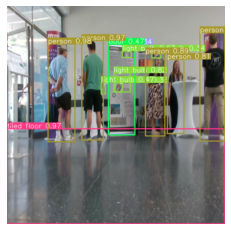

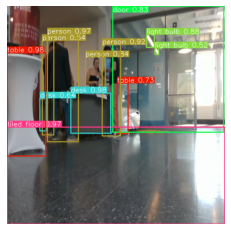

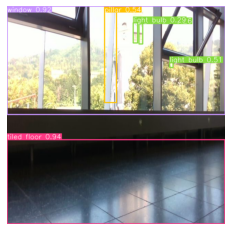

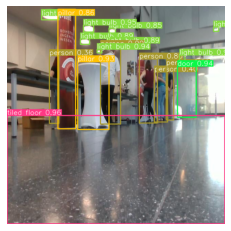

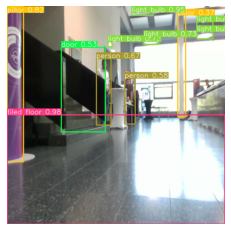

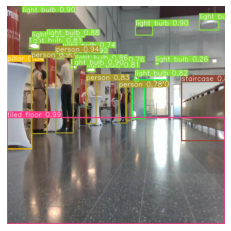

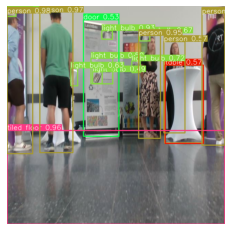

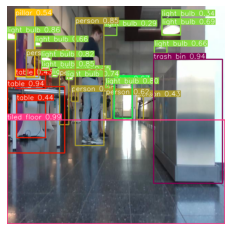

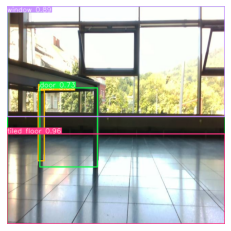

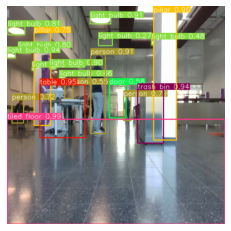

In [31]:
%matplotlib inline
image_folder = '/home/linus/AML WS2024/seen_images'
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
# Run the inference on all images in the folder
results = model(image_paths)

# Loop through the results and display each one
for result in results:
    plt.imshow(result.plot()) 
    plt.axis('off')  
    plt.show()  

Run the inference on multiple unseen images:

In [ ]:
%matplotlib inline
image_folder = '/home/linus/AML/AML WS2024/unseen_images'
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
# Run the inference on all images in the folder
results = model(image_paths)

for result in results:
    plt.imshow(result.plot()) 
    plt.axis('on')  
    plt.show()  

### Metrics and Analysis

#### Load the trainig results and clean the data

In [32]:
csv_file_path = '/home/linus/AML WS2024/runs/detect/train2/results.csv'
df = pd.read_csv(csv_file_path)

# Clean up column names (strip extra spaces)
df.columns = df.columns.str.strip()

# Display the first few rows to verify
df.head()


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.28500,3.7461,1.2602,0.06016,0.13102,0.12611,0.09123,1.05480,3.5584,1.03350,0.000136,0.000136,0.000136
1,2,1.03350,2.2626,1.1082,0.86083,0.20364,0.22885,0.17562,0.99421,2.2950,1.02580,0.000269,0.000269,0.000269
2,3,0.97926,1.7456,1.0978,0.81779,0.29519,0.30237,0.23758,0.90653,1.5613,0.99591,0.000397,0.000397,0.000397
3,4,0.95054,1.4877,1.0769,0.80752,0.33355,0.36907,0.29559,0.86851,1.3452,0.97943,0.000392,0.000392,0.000392
4,5,0.88531,1.3310,1.0519,0.81209,0.42017,0.40504,0.34097,0.85487,1.3189,0.97010,0.000392,0.000392,0.000392


#### How the box loss, classification loss, and distributional focal loss changed over time.

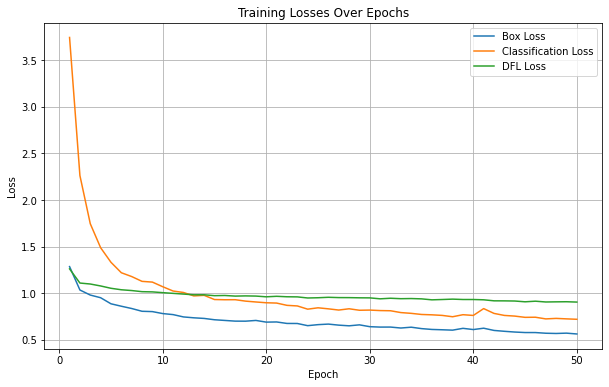

In [33]:
# Extract the relevant columns from the training result
train_box_loss = df['train/box_loss']
train_cls_loss = df['train/cls_loss']
train_dfl_loss = df['train/dfl_loss']

# Plot the training losses
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], train_box_loss, label='Box Loss')
plt.plot(df['epoch'], train_cls_loss, label='Classification Loss')
plt.plot(df['epoch'], train_dfl_loss, label='DFL Loss')
plt.title('Training Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#### How the validation losses changed over time

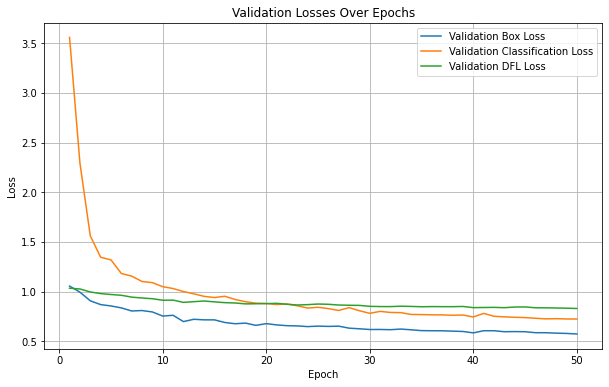

In [34]:
# Extract relevant columns for validation losses
val_box_loss = df['val/box_loss']
val_cls_loss = df['val/cls_loss']
val_dfl_loss = df['val/dfl_loss']

# Plot the validation losses
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], val_box_loss, label='Validation Box Loss')
plt.plot(df['epoch'], val_cls_loss, label='Validation Classification Loss')
plt.plot(df['epoch'], val_dfl_loss, label='Validation DFL Loss')
plt.title('Validation Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Analyze the Validation Metrics (Precision, Recall, mAP)

In [ ]:
# Extract relevant columns for validation metrics
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
map50 = df['metrics/mAP50(B)']
map50_95 = df['metrics/mAP50-95(B)']

# Plot validation metrics
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], precision, label='Precision')
plt.plot(df['epoch'], recall, label='Recall')
plt.plot(df['epoch'], map50, label='mAP@0.5')
plt.plot(df['epoch'], map50_95, label='mAP@0.5:0.95')
plt.title('Validation Metrics Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

#### Learning Rate Over Time

In [ ]:
# Extract relevant columns for learning rates
lr_pg0 = df['lr/pg0']
lr_pg1 = df['lr/pg1']
lr_pg2 = df['lr/pg2']

# Plot learning rates
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], lr_pg0, label='Learning Rate pg0')
plt.plot(df['epoch'], lr_pg1, label='Learning Rate pg1')
plt.plot(df['epoch'], lr_pg2, label='Learning Rate pg2')
plt.title('Learning Rates Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

#### Performance Summary

In [ ]:
# Extract the final epoch (last row) metrics
final_epoch = df.iloc[-1]

# Summary of performance at the final epoch
performance_summary = {
    'Final Box Loss (Train)': final_epoch['train/box_loss'],
    'Final Classification Loss (Train)': final_epoch['train/cls_loss'],
    'Final DFL Loss (Train)': final_epoch['train/dfl_loss'],
    'Final Box Loss (Validation)': final_epoch['val/box_loss'],
    'Final Classification Loss (Validation)': final_epoch['val/cls_loss'],
    'Final DFL Loss (Validation)': final_epoch['val/dfl_loss'],
    'Final Precision': final_epoch['metrics/precision(B)'],
    'Final Recall': final_epoch['metrics/recall(B)'],
    'Final mAP@0.5': final_epoch['metrics/mAP50(B)'],
    'Final mAP@0.5:0.95': final_epoch['metrics/mAP50-95(B)'],
}

# Print the performance summary
for metric, value in performance_summary.items():
    print(f"{metric}: {value}")

#### Summary of the Analysis:
##### Training Loss: 
Shows how well the model learned over epochs.
##### Validation Loss: 
Indicates how well the model generalized to unseen data.
##### Precision & Recall: 
Key metrics for evaluating the accuracy of the model's predictions.
##### mAP (Mean Average Precision): 
Indicates how well the model is detecting objects (higher mAP is better).
##### Learning Rate: 
Shows how the learning rate was scheduled and adjusted during training